In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def points_out_of_contols(x,y,lcl,ucl):
    scv={'x':[],'y':[]}
    for k in range(len(y)):
        if y[k]>ucl or y[k]<lcl:
            scv['x'].append(x[k])
            scv['y'].append(y[k])
    return scv

def check_less_than_value(arr,value):
    for i in arr:
        if(i>=value):return False
    return True

def check_greater_than_value(arr,value):
    for i in arr:
        if(i<=value):return False
    return True

def get_points_with_pattern(x,y,mean):
    scv={'x':[],'y':[]}
    for k in range(len(y)):
        if(k+7<len(y)): 
            if check_less_than_value(y[k:k+8],mean):
                scv['x']+=x[k:k+8]
                scv['y']+=y[k:k+8]
            if check_greater_than_value(y[k:k+8],mean):
                scv['x']+=x[k:k+8]
                scv['y']+=y[k:k+8]
    return scv

def plot_control_chart(x,y,mean,lcl,ucl,scv_ool,scv_pwp,x_axis_label,y_axis_label):
    '''
        lcl => low control level
        ucl => upper control level
        scv_ool => special control variations [out of limits]
        scv_pwp => special control variations [patterns]
    '''
    plt.plot(x,y,'o-k')
    plt.plot(scv_ool['x'],scv_ool['y'],'o',color='r')
    plt.plot(scv_pwp['x'],scv_pwp['y'],'o',color='y')
    plt.axhline(y=mean,color='g',ls='dashed')
    plt.axhline(y=ucl,color='r',ls='dashed')
    plt.axhline(y=lcl,color='r',ls='dashed')
    plt.xlabel(xlabel=x_axis_label,labelpad=10)
    plt.ylabel(ylabel=y_axis_label,labelpad=10)
    plt.show()

UCL = 0.05593471288324664, LCL = 0.012289715742043936, p_mean = 0.034112214312645286


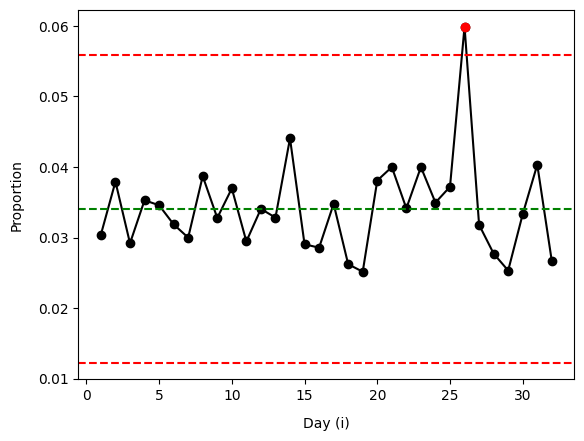

In [4]:
def show_p_chart(csv_path):
    data=pd.read_csv(csv_path)
    i=data[f'{data.columns[0]}'].tolist()
    n=data[f'{data.columns[1]}'].tolist()
    X=data[f'{data.columns[2]}'].tolist()
    p=[]
    for k in range(len(i)):
        p.append(X[k]/n[k])
    p_mean=np.mean(p)
    ucl=p_mean+3*np.sqrt(p_mean*(1-p_mean)/np.mean(n))
    lcl=p_mean-3*np.sqrt(p_mean*(1-p_mean)/np.mean(n))
    if lcl<0: 
        lcl=0

    # Check if there are point greater than UCL or lower than LCL
    # SCV=> Special Cause Variations
    scv_out_of_limits=points_out_of_contols(i,p,lcl,ucl)
    scv_with_pattern=get_points_with_pattern(i,p,p_mean)
    print(f'UCL = {ucl}, LCL = {lcl}, p_mean = {p_mean}')
    plot_control_chart(i,p,p_mean,lcl,ucl,scv_out_of_limits,scv_with_pattern,data.columns[0],'Proportion')

show_p_chart(csv_path='./p_chart_data/medical_sponges.csv')

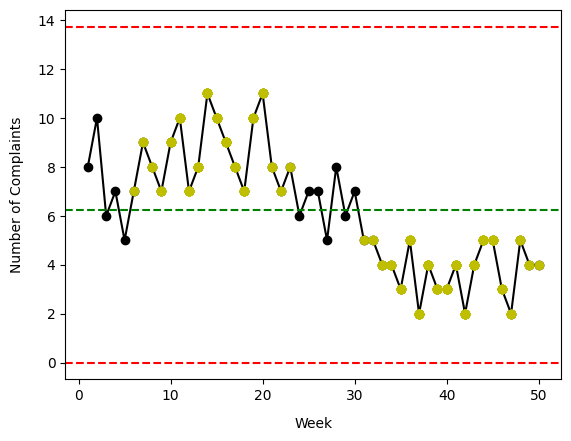

In [5]:
def show_c_chart(csv_path):
    data=pd.read_csv(csv_path)
    i=data[f'{data.columns[0]}'].tolist()
    c=data[f'{data.columns[1]}'].tolist()
    c_mean=np.mean(c)
    ucl=c_mean+3*np.sqrt(c_mean)
    lcl=c_mean-3*np.sqrt(c_mean)
    if lcl<0: 
        lcl=0
    scv_out_of_limits=points_out_of_contols(i,c,lcl,ucl)
    scv_with_pattern=get_points_with_pattern(i,c,c_mean)
    plot_control_chart(i,c,c_mean,lcl,ucl,scv_out_of_limits,scv_with_pattern,data.columns[0],data.columns[1])

show_c_chart('./c_chart_data/guest_complaints.csv')

In [6]:
nums=[]
for j in range(32):
    nums.append(-np.sin(j*3)**2-4*np.sin(5*j*np.cos(1/2*j)))

my_data=pd.read_csv('./c_chart_data//guest_complaints.csv')['Number of Complaints'].tolist()

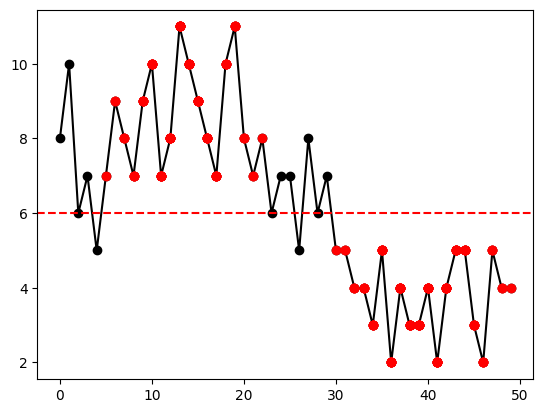

In [7]:
plt.plot(my_data,'o-k')
for k in range(len(my_data)):
    if(k+7<len(my_data)): 
        if check_less_than_value(my_data[k:k+8],6):
            plt.plot([k,k+1,k+2,k+3,k+4,k+5,k+6,k+7],my_data[k:k+8],'o',color='r')
        if check_greater_than_value(my_data[k:k+8],6):
            plt.plot([k,k+1,k+2,k+3,k+4,k+5,k+6,k+7],my_data[k:k+8],'o',color='r')
plt.axhline(y=6,color='r',ls='dashed')
plt.show()

In [8]:
# constants=pd.read_csv('./constants_table/constants_table.csv')
# constants


def getD3(n):
    if n>=2:
        return pd.read_csv('./constants_table/constants_table_01.csv')['D3'].tolist()[n-2]
    else: return 
def getD4(n):
    if n>=2:
        return pd.read_csv('./constants_table/constants_table_01.csv')['D4'].tolist()[n-2]
    else: return 
    
def getA2(n):
    if n>=2:
        return pd.read_csv('./constants_table/constants_table_01.csv')['A2'].tolist()[n-2]
    elif n>25: return 3/np.sqrt(n)
    else: return 

def getA3(n):
    if n>=2:
        return pd.read_csv('./constants_table/constants_table_02.csv')['A3'].tolist()[n-2]
    else: return 

def getB3(n):
    if n>=2:
        return pd.read_csv('./constants_table/constants_table_02.csv')['B3'].tolist()[n-2]
    elif n>25: return 1-3/np.sqrt(2*n)
    else: return 

def getB4(n):
    if n>=2:
        return pd.read_csv('./constants_table/constants_table_02.csv')['B4'].tolist()[n-2]
    elif n>25: return 1+3/np.sqrt(2*n)
    else: return 

def getE2(n):
    if n>=2 and n<=10:
        return pd.read_csv('./constants_table/constants_table_02.csv')['E2'].tolist()[n-2]
    else: return

In [9]:
getB4(10)

'1.716'

In [10]:
def convert_text_to_num(arr):
    num_arr=[]
    for num in arr:
        num_arr.append(float(num))
    return num_arr
    
x_data=pd.read_csv('./customers_waiting _times.csv')
x_data
print(len(x_data.columns[1:]))
hrs=x_data[x_data.columns[0]].tolist()
data_rows=x_data[x_data.columns[1:]].values
data_rows
mean_rows=[]
range_rows=[]
for row in data_rows:
    car_raws=convert_text_to_num(row)
    mean_rows.append(np.mean(car_raws))
    range_rows.append(np.max(car_raws)-np.min(car_raws))

print(np.sum(mean_rows))
print(np.sum(range_rows))



4
112.05000000000001
62.79999999999999


In [11]:
def ssd(arr):
    '''
    ssd => Sample Standard Deviation
    s=sqrt(sum(xi-x_bar)^2/N-1)
    '''
    x_bar=np.mean(arr)
    sum=0
    for xi in arr:
        sum+=(xi-x_bar)**2
    s=np.sqrt(sum/(len(arr)-1))
    return s


10
S_bar=215.68861654337272
370.1216659884276
61.25556709831785


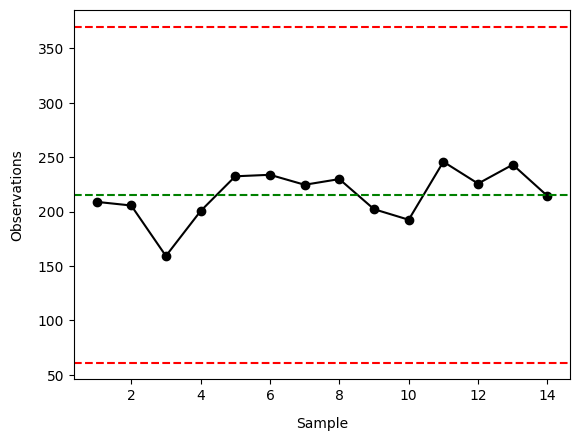

In [12]:
def show_r_s_chart(csv_file):
    data=pd.read_csv(csv_file)
    samples=data[data.columns[0]].tolist()
    if len(data.columns[1:])>9:
        obs=data[data.columns[1:]].values
        n_obs=len(data.columns[1:])
        print(n_obs)
        s=[]
        for row in obs:
            s.append(ssd(row))
        s_bar=np.mean(s)
        ucl=float(getB4(n_obs))*s_bar
        lcl=float(getB3(n_obs))*s_bar
        if lcl<0: 
            lcl=0

        print(f'S_bar={s_bar}')
        print(ucl)
        print(lcl)
        scv_out_of_limits=points_out_of_contols(samples,s,lcl,ucl)
        scv_with_pattern=get_points_with_pattern(samples,s,s_bar)
        plot_control_chart(samples,s,s_bar,lcl,ucl,scv_out_of_limits,scv_with_pattern,data.columns[0],'Observations')

    else:
        obs=data[data.columns[1:]].values
        n_obs=len(data.columns[1:])
        R=[]
        for row in obs:
            R.append(np.max(row)-np.min(row))
        R_bar=np.mean(R)
        ucl=getD4(n_obs)*R_bar
        lcl=getD3(n_obs)*R_bar
        if lcl<0: 
            lcl=0

        print(f'R_bar={R_bar}')
        print(ucl)
        print(lcl)
        scv_out_of_limits=points_out_of_contols(samples,R,lcl,ucl)
        scv_with_pattern=get_points_with_pattern(samples,R,R_bar)
        plot_control_chart(samples,R,R_bar,lcl,ucl,scv_out_of_limits,scv_with_pattern,data.columns[0],'Observations')

# show_r_s_chart('./luggage_delivery_times.csv')
show_r_s_chart('./al_rashid_hospital.csv')

lcl = 331.589313155926, ucl = 752.1821154155027
752.1821154155027
331.589313155926


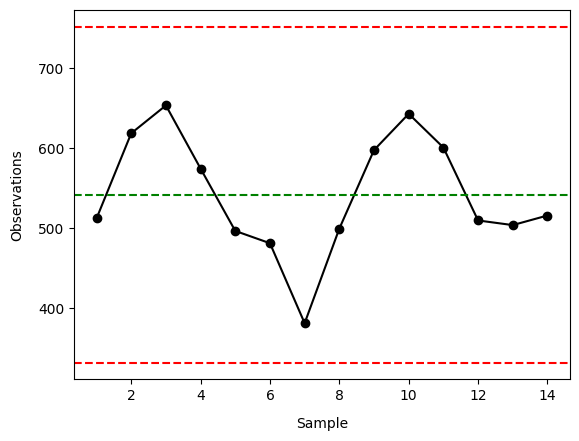

In [13]:
def show_X_bar_char(csv_file):
    data=pd.read_csv(csv_file)
    samples=data[data.columns[0]].tolist()
    if len(data.columns[1:])>9:
        obs=data[data.columns[1:]].values
        n_obs=len(data.columns[1:])
        X_bar=[]
        s=[]
        for row in obs:
            s.append(ssd(row))
            X_bar.append(np.mean(row))
        X_bar_bar=np.mean(X_bar)
        s_bar=np.mean(s)
        ucl=X_bar_bar+getA3(n_obs)*s_bar
        lcl=X_bar_bar-getA3(n_obs)*s_bar
        print(f'lcl = {lcl}, ucl = {ucl}')
    else:
        obs=data[data.columns[1:]].values
        n_obs=len(data.columns[1:])
        X_bar=[]
        R=[]
        for row in obs:
            R.append(np.max(row)-np.min(row))
            X_bar.append(np.mean(row))

        X_bar_bar=np.mean(X_bar)
        R_bar=np.mean(R)
        ucl=X_bar_bar+getA2(n_obs)*R_bar
        lcl=X_bar_bar-getA2(n_obs)*R_bar
    if lcl<0: 
        lcl=0
    print(ucl)
    print(lcl)
    scv_out_of_limits=points_out_of_contols(samples,X_bar,lcl,ucl)
    scv_with_pattern=get_points_with_pattern(samples,X_bar,X_bar_bar)
    plot_control_chart(samples,X_bar,X_bar_bar,lcl,ucl,scv_out_of_limits,scv_with_pattern,data.columns[0],'Observations')

show_X_bar_char('./al_rashid_hospital.csv')

lcl = 331.589313155926, ucl = 752.1821154155027
752.1821154155027
331.589313155926


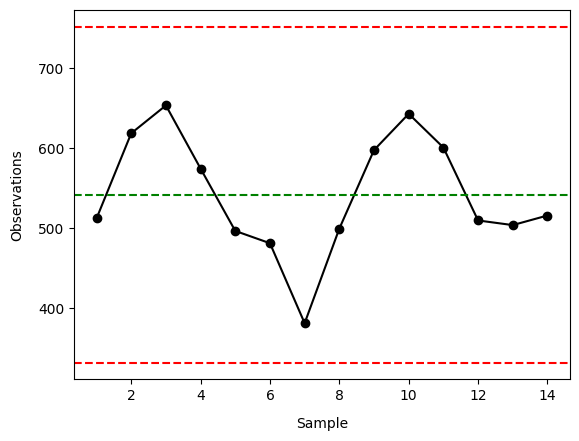

10
S_bar=215.68861654337272
370.1216659884276
61.25556709831785


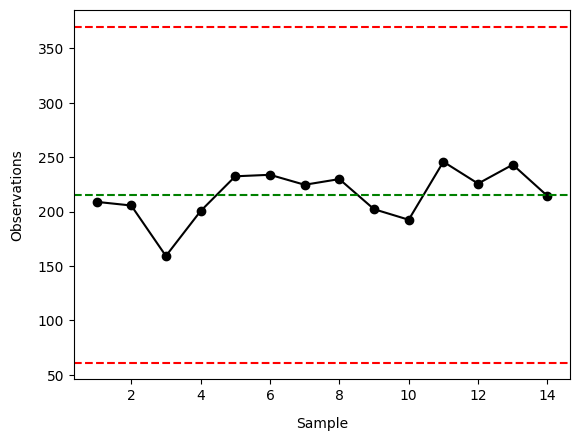

In [14]:
show_X_bar_char('./al_rashid_hospital.csv')
show_r_s_chart('./al_rashid_hospital.csv')

lcl = 13.720281396541624, ucl = 34.91971860345838
34.91971860345838
13.720281396541624


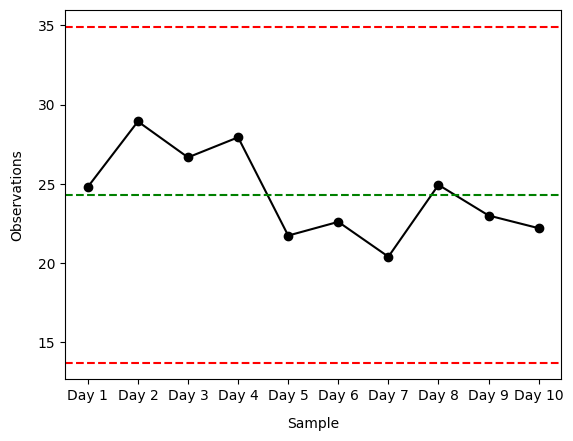

15
S_bar=13.434370853559411
21.118830981795394
5.749910725323428


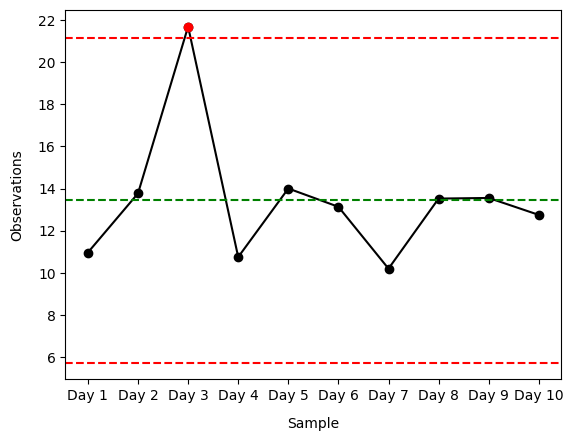

In [15]:
show_X_bar_char('./emergency_rooms.csv')
show_r_s_chart('./emergency_rooms.csv')

lcl = 13.720281396541624, ucl = 34.91971860345838
34.91971860345838
13.720281396541624


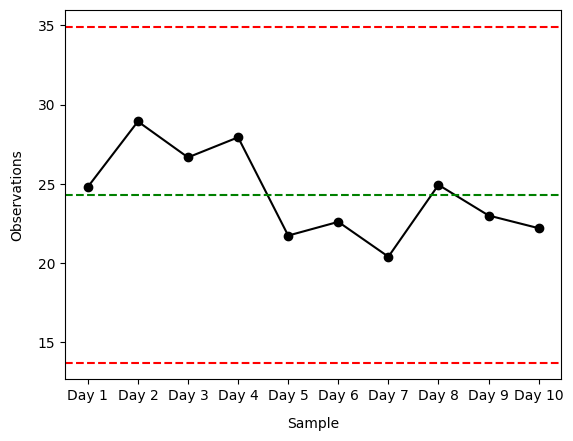

15
S_bar=13.434370853559411
21.118830981795394
5.749910725323428


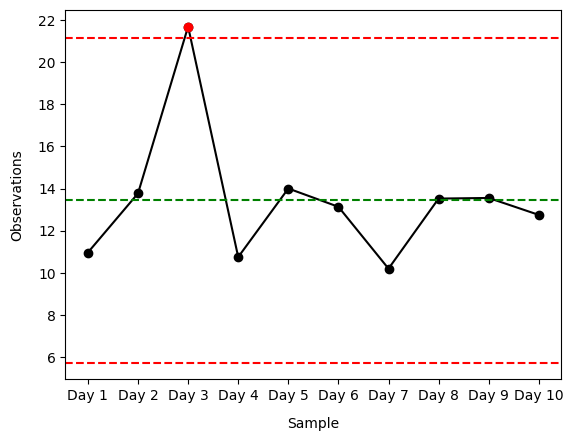

In [16]:
show_X_bar_char('./al_jamhouria_hospital.csv')
show_r_s_chart('./al_jamhouria_hospital.csv')

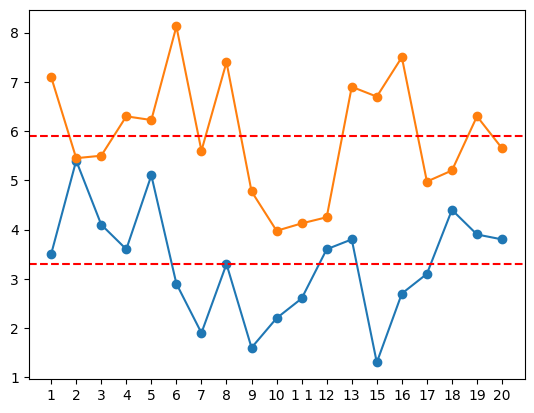

In [17]:
plt.plot(hrs,range_rows,'o-')
plt.plot(hrs,mean_rows,'o-')
plt.axhline(y=np.mean(range_rows),color='r',ls='dashed')
plt.axhline(y=np.mean(mean_rows),color='r',ls='dashed')

In [18]:
print(getD3(9))
print(getD4(9))
print(getA2(9))

0.184
1.816
0.337
